# ICC World Cup 2023: Player Performance Clustering
This project analyzes batting performance of players in the 2023 Cricket World Cup using clustering algorithms. It explores metrics such as Strike Rate, Boundary Percentage, and Total Runs to group players into performance-based clusters.


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# 1.Data Loading & Overview  

In [15]:
df=pd.read_csv(r"F:\Devesh\wc23\icc_wc_23_bat.csv")

In [16]:
df.head() #Display the first few rows

,player,dismissal,runs,balls,minutes,4s,6s,strike_rate,team,opponent,innings,match_id
0,Glenn Maxwell,not out,201,128,181,21,10,157.03,Australia,Afghanistan,2,27
1,Mitchell Marsh,not out,177,132,177,17,9,134.09,Australia,Bangladesh,2,22
2,Quinton de Kock,c Nasum Ahmed b Hasan Mahmud,174,140,192,15,7,124.28,South Africa,Bangladesh,1,5
3,David Warner,c sub (Shadab Khan) b Haris Rauf,163,124,180,14,9,131.45,Australia,Pakistan,1,37
4,Devon Conway,not out,152,121,147,19,3,125.61,New Zealand,England,2,17


In [17]:
df.describe() #Descriptive Statistcis of the data

,runs,balls,minutes,4s,6s,strike_rate,innings,match_id
count,875.000000,875.000000,875.000000,875.000000,875.000000,875.000000,875.000000,875.000000
mean,26.773714,29.090286,42.259429,2.558857,0.736000,82.771337,1.459429,23.186286
std,31.018840,28.579166,41.752733,3.148084,1.490633,53.106854,0.498636,13.828329
min,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,5.000000,8.000000,12.000000,0.000000,0.000000,50.000000,1.000000,11.500000
50%,15.000000,19.000000,27.000000,1.000000,0.000000,80.430000,1.000000,23.000000
75%,39.000000,40.500000,59.000000,4.000000,1.000000,106.660000,2.000000,35.000000
max,201.000000,143.000000,217.000000,21.000000,11.000000,600.000000,2.000000,47.000000


# 2 Data Preprocessing (Scaling & Handling Missing Values)  

In [18]:
df.isnull().sum() #To check if there is any missing values in the data

player         0
dismissal      0
runs           0
balls          0
minutes        0
4s             0
6s             0
strike_rate    0
team           0
opponent       0
innings        0
match_id       0
dtype: int64

In [19]:
#Group by Player and Calculate Total Runs
players_total_runs=df.groupby("player")["runs"].sum().reset_index()

#Rename the column to avoid confusion
players_total_runs.rename(columns={"runs":"Total_Runs"},inplace=True)
if "Total_Runs" in df.columns:
    df.drop(columns=["Total_Runs"], inplace=True)
    
#Merge the Total Runs Column Back with Original Dataset
df=df.merge(players_total_runs, on='player', how='left')
#Display the updated dataset
df.head()


,player,dismissal,runs,balls,minutes,4s,6s,strike_rate,team,opponent,innings,match_id,Total_Runs
0,Glenn Maxwell,not out,201,128,181,21,10,157.03,Australia,Afghanistan,2,27,400
1,Mitchell Marsh,not out,177,132,177,17,9,134.09,Australia,Bangladesh,2,22,441
2,Quinton de Kock,c Nasum Ahmed b Hasan Mahmud,174,140,192,15,7,124.28,South Africa,Bangladesh,1,5,594
3,David Warner,c sub (Shadab Khan) b Haris Rauf,163,124,180,14,9,131.45,Australia,Pakistan,1,37,535
4,Devon Conway,not out,152,121,147,19,3,125.61,New Zealand,England,2,17,372


# 3 Feature Engineering  

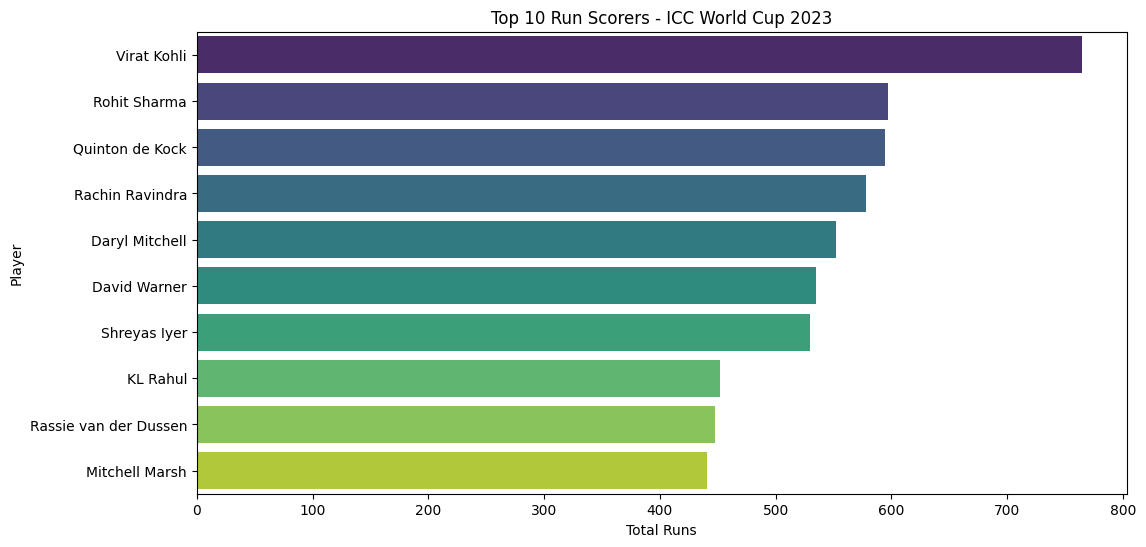

In [20]:
#Grouping by Player and sum Runs
player_total_runs = df.groupby("player")["runs"].sum().reset_index()

# Sort by total runs and get the top 10 players
top_scorers = player_total_runs.sort_values(by="runs", ascending=False).head(10)

# Plot bar chart
plt.figure(figsize=(12, 6))
sns.barplot(x="runs", y="player", data=top_scorers, palette="viridis",hue='player')

# Labels and Title
plt.xlabel("Total Runs")
plt.ylabel("Player")
plt.title("Top 10 Run Scorers - ICC World Cup 2023")
plt.show()


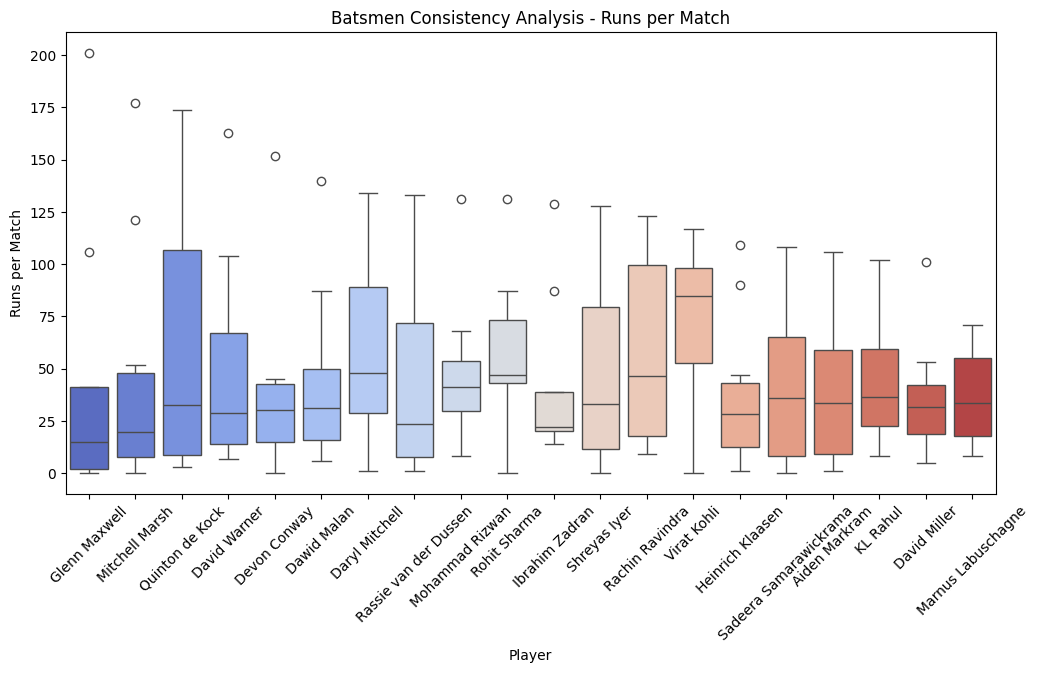

In [21]:
# Select batsmen who have scored the most runs
top_batsmen = df.groupby("player")["runs"].sum().nlargest(20).index

# Filter dataset for these batsmen
df_top_batsmen = df[df["player"].isin(top_batsmen)]

# Plot Boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(x="player", y="runs", data=df_top_batsmen, palette="coolwarm",hue='player')

# Customizations
plt.xlabel("Player")
plt.ylabel("Runs per Match")
plt.xticks(rotation=45)
plt.title("Batsmen Consistency Analysis - Runs per Match")
plt.show()

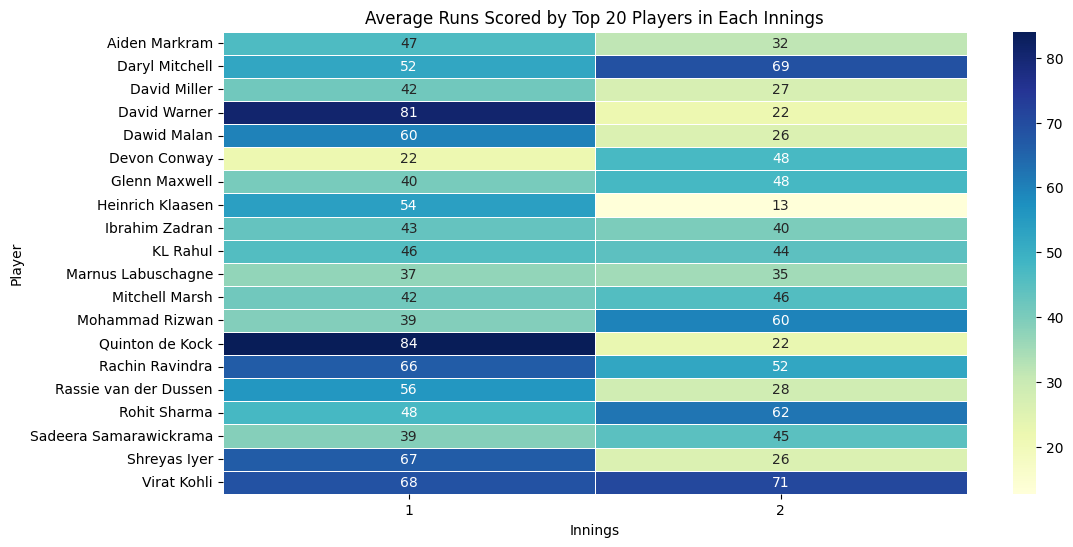

In [22]:
# Step 1: Group by Player and Sum Runs
top_batsmen = df.groupby("player")["runs"].sum().nlargest(20).index

# Step 2: Filter Dataset for Top 10 Players
df_top = df[df["player"].isin(top_batsmen)]

# Step 3: Create Pivot Table (Player vs. Innings with Average Runs)
pivot_table = df_top.pivot_table(index="player", columns="innings", values="runs", aggfunc="mean")

# Step 4: Plot Heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(pivot_table, annot=True, cmap="YlGnBu", linewidths=0.5)

# Labels and Title
plt.xlabel("Innings")
plt.ylabel("Player")
plt.title("Average Runs Scored by Top 20 Players in Each Innings")
plt.show()


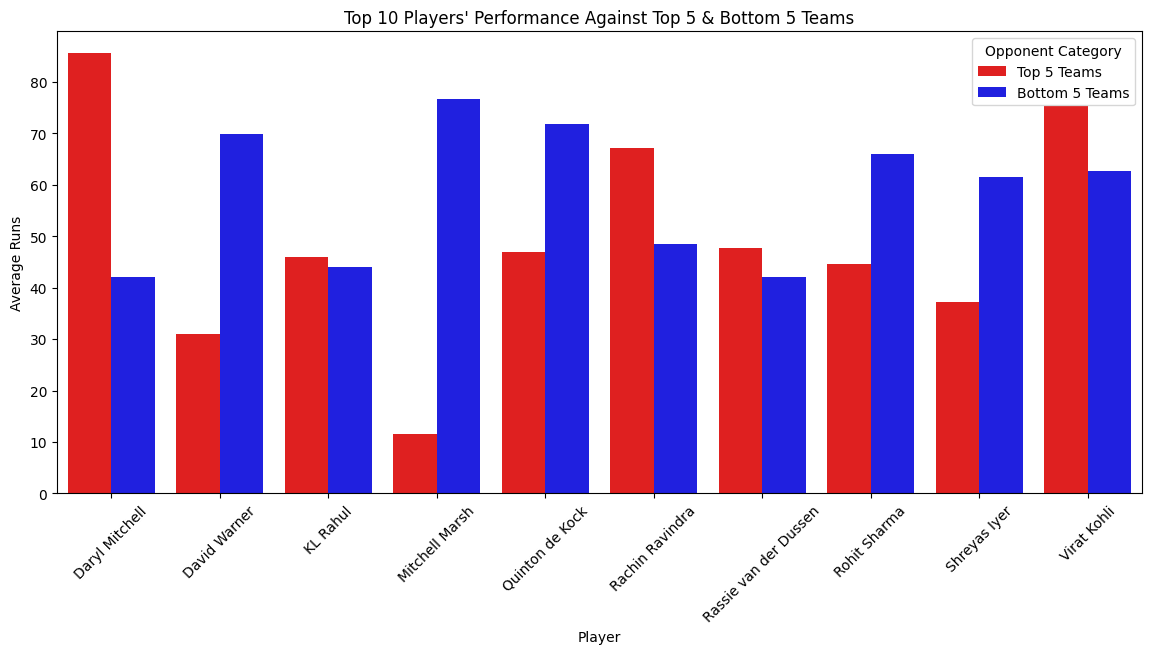

In [30]:

top_5_teams = ["India", "Australia", "South Africa", "New Zealand", "England"]
bottom_5_teams = ["Bangladesh", "Netherlands", "Afghanistan", "Pakistan", "Sri Lanka"]

# Get Top 10 Players by Total Runs
top_10_players = df.groupby("player")["runs"].sum().nlargest(10).index
df_top_10 = df[df["player"].isin(top_10_players)]

# Performance against Top 5 teams
top_5_performance = df_top_10[df_top_10["opponent"].isin(top_5_teams)].groupby("player")["runs"].mean().reset_index()
top_5_performance["category"] = "Top 5 Teams"

# Performance against Bottom 5 teams
bottom_5_performance = df_top_10[df_top_10["opponent"].isin(bottom_5_teams)].groupby("player")["runs"].mean().reset_index()
bottom_5_performance["category"] = "Bottom 5 Teams"

# Combine both datasets
performance_comparison = pd.concat([top_5_performance, bottom_5_performance])

# Plot the comparison
plt.figure(figsize=(14,6))
sns.barplot(x="player", y="runs", hue="category", data=performance_comparison, palette=["red", "blue"])
plt.xticks(rotation=45)
plt.xlabel("Player")
plt.ylabel("Average Runs")
plt.title("Top 10 Players' Performance Against Top 5 & Bottom 5 Teams")
plt.legend(title="Opponent Category")
plt.show()


# 4. Clustering using KMean

In [32]:
# Convert dismissal to string and fill missing
df["dismissals"] = df["dismissal"].astype(str).fillna("Not Out")

# 1 if dismissed, else 0
df["is_dismissed"] = df["dismissals"].apply(lambda x: 0 if x.lower() == "not out" else 1)

# Total dismissals and runs per player
dism = df.groupby("player")["is_dismissed"].sum().reset_index()
dism.rename(columns={"is_dismissed": "total_dismissals"}, inplace=True)
runs = df.groupby("player")["runs"].sum().reset_index()

# Merge and calculate average
stats = pd.merge(runs, dism, on="player", how="left")
stats["batting_avg"] = stats["runs"] / stats["total_dismissals"].replace(0, np.nan)

# Drop old avg if exists and merge back
if "batting_avg" in df.columns:
    df.drop("batting_avg", axis=1, inplace=True)
df = df.merge(stats[["player", "batting_avg"]], on="player", how="left")

# Sample check
print(df[["player", "runs", "batting_avg"]].head())


            player  runs  batting_avg
0    Glenn Maxwell   201    66.666667
1   Mitchell Marsh   177    49.000000
2  Quinton de Kock   174    59.400000
3     David Warner   163    48.636364
4     Devon Conway   152    41.333333


In [25]:
# Calculating Boundary Percentage
df["boundary_percentage"] = ((df["4s"] * 4 + df["6s"] * 6) / df["runs"]) * 100

# Selecting relevant columns for clustering
features = df[["strike_rate", "boundary_percentage", "batting_average"]]

In [26]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Converting the dataframe for better readability 
scaled_df = pd.DataFrame(scaled_features, columns=features.columns)
scaled_df.head()

,strike_rate,boundary_percentage,batting_average
0,1.399087,0.834528,1.797917
1,0.966881,0.742244,0.882526
2,0.782054,0.391972,1.421398
3,0.917142,0.693237,0.863684
4,0.807112,0.501460,0.485281


# 5. Elbow Method to Determine Optimal K 

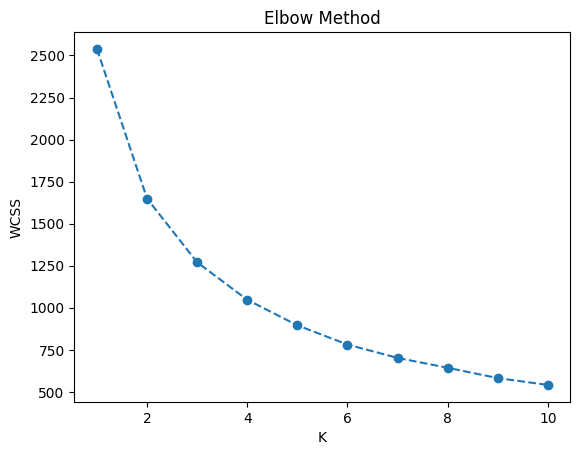

In [33]:
# Scale and impute
scaled = SimpleImputer(strategy="mean").fit_transform(StandardScaler().fit_transform(features))

# Elbow method
inertia = [KMeans(n_clusters=k, random_state=42, n_init=10).fit(scaled).inertia_ for k in range(1, 11)]

# Plot
plt.plot(range(1, 11), inertia, 'o--')
plt.xlabel("K")
plt.ylabel("WCSS")
plt.title("Elbow Method")
plt.show()


# 6. Cluster Analysis and Visualization  

In [28]:
# Applying K-Means with chosen K 
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
df["cluster"] = kmeans.fit_predict(scaled_features)

# Display cluster assignments
df[["player", "cluster"]].head(10)


,player,cluster
0,Glenn Maxwell,0
1,Mitchell Marsh,0
2,Quinton de Kock,0
3,David Warner,0
4,Devon Conway,2
5,Dawid Malan,0
6,Travis Head,0
7,Daryl Mitchell,0
8,Rassie van der Dussen,0
9,Mohammad Rizwan,0


# 7. Top 20 Player Comparison 

Unique Players in Filtered DF: 20


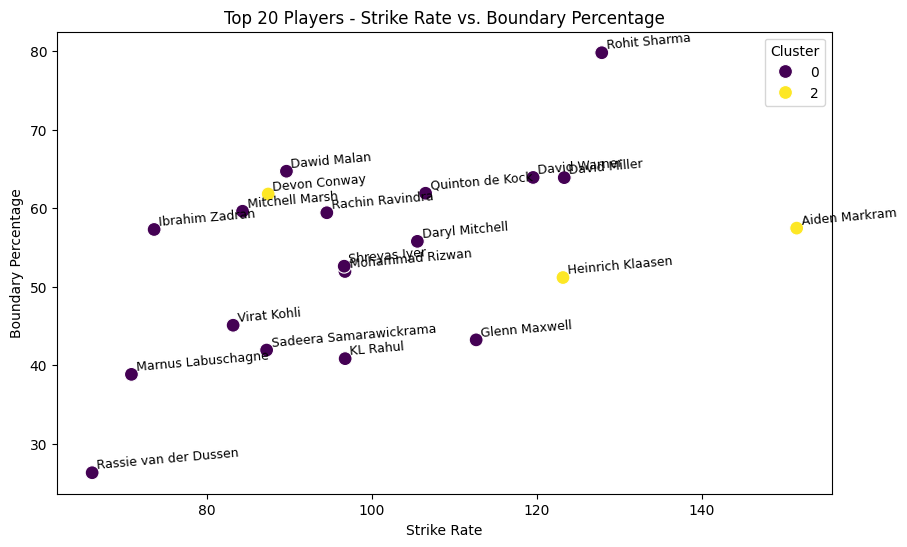

In [29]:
#Selecting the top 10 players based on total runs
top_10_players = df.groupby("player", as_index=False)["runs"].sum().nlargest(20, "runs")["player"]

#Filtering dataset to include only these top 10 players
filtered_df = df[df["player"].isin(top_10_players)]

#Ensuring we have only one row per player by aggregating relevant stats
filtered_df = filtered_df.groupby("player", as_index=False).agg({
    "strike_rate": "mean",  # Take the mean strike rate
    "boundary_percentage": "mean",  # Take the mean boundary percentage
    "cluster": "first"  # Keep the first assigned cluster
})

#Checking the number of unique players in the filtered DataFrame
print("Unique Players in Filtered DF:", filtered_df["player"].nunique())

#Plotting only the top 10 players
plt.figure(figsize=(10,6))
sns.scatterplot(x=filtered_df["strike_rate"], 
                y=filtered_df["boundary_percentage"], 
                hue=filtered_df["cluster"], 
                palette="viridis", 
                s=100)
for index, row in filtered_df.iterrows():
    plt.text(row["strike_rate"] + 0.5, row["boundary_percentage"] + 0.5, 
             row["player"], fontsize=9, color='black',rotation=5)
    

plt.xlabel("Strike Rate")
plt.ylabel("Boundary Percentage")
plt.title("Top 20 Players - Strike Rate vs. Boundary Percentage")
plt.legend(title="Cluster")
plt.show()

# 8 Conclusion 

In [31]:
# Display players with cluster labels
filtered_df.sort_values("cluster")


,player,strike_rate,boundary_percentage,cluster
9,KL Rahul,96.785000,40.849473,0
17,Sadeera Samarawickrama,87.267778,41.943421,0
16,Rohit Sharma,127.897273,79.805764,0
15,Rassie van der Dussen,66.114000,26.322880,0
14,Rachin Ravindra,94.567000,59.428398,0
13,Quinton de Kock,106.539000,61.912658,0
12,Mohammad Rizwan,96.765000,51.947038,0
11,Mitchell Marsh,84.350000,59.619298,0
10,Marnus Labuschagne,70.879000,38.847247,0
19,Virat Kohli,83.206364,45.102901,0


## Conclusion

- We grouped the World Cup 2023 players into 3 performance clusters.
- Cluster 0 represents consistent and aggressive scorers with high strike rate and boundary frequency(match winners).
- Cluster 1 (if present) had players with moderate stats and steady performances.
- Cluster 2 includes players with relatively lower impact.
- This analysis helps in understanding player roles and identifying match-winners.

  ### Future Scope
- Add bowling data for all-rounder analysis.
- Use PCA to reduce dimensionality for better cluster separation.
- Track performance evolution over tournament phases.